In [294]:
import json
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np

import thinkplot
import matplotlib.pyplot as plt
import timeseries 
import statsmodels.formula.api as smf

import thinkstats2


In [295]:
#Real Data Renewable Energy Dataset
df = pd.read_json('Renewable_energyconsmp.json')
#rename column for index
df.rename(columns = {'Country Code': 'Country_Code','Value': 'renewConsumptionPercent'}, inplace = True)
del df['Country Name']
Renew = df
#subset dataset with country code NAC 
Renew_EAS = Renew[Renew["Country_Code"] == 'EAS']
Renew_NAC = Renew[Renew["Country_Code"] == 'NAC']

Renew_NAC.columns
print(Renew_EAS)


    Country_Code  renewConsumptionPercent  Year
104          EAS                26.196254  1990
105          EAS                25.765811  1991
106          EAS                25.328606  1992
107          EAS                24.585475  1993
108          EAS                23.861375  1994
109          EAS                22.903000  1995
110          EAS                23.012842  1996
111          EAS                22.805913  1997
112          EAS                22.949012  1998
113          EAS                22.731108  1999
114          EAS                22.263042  2000
115          EAS                21.553554  2001
116          EAS                20.916598  2002
117          EAS                19.590337  2003
118          EAS                17.711045  2004
119          EAS                16.597160  2005
120          EAS                16.075711  2006
121          EAS                15.039892  2007
122          EAS                14.751644  2008
123          EAS                14.45428

In [296]:
Renew.renewConsumptionPercent.mean()
a = Renew[Renew['renewConsumptionPercent']>90]
a

,Country_Code,renewConsumptionPercent,Year
1716,BEN,93.703241,1990
1717,BEN,94.964848,1991
1718,BEN,94.851835,1992
1719,BEN,94.988801,1993
1720,BEN,94.975035,1994
...,...,...,...
6553,ZMB,92.961409,2007
6554,ZMB,92.182579,2008
6555,ZMB,92.086560,2009
6556,ZMB,92.104297,2010


In [297]:
#fossil_fuel.json

df = pd.read_json('fossil_fuel.json')
df
df.rename(columns={'Country Code': 'Country_Code'}, inplace = True)
del df['Country Name']
Fossil_NAC = df[df['Country_Code']=='NAC']
Fossil_NAC = Fossil_NAC[Fossil_NAC['Year']>=1990]
Fossil_NAC.rename(columns = {'Value': 'fossilConsumptionPercent'}, inplace = True)
#Fossil_NAC = Fossil_NAC.reindex(columns=['Year','Country_Code','%_fossilConsumptionNAC'])
Fossil_NAC


,Country_Code,fossilConsumptionPercent,Year
1592,NAC,85.162737,1990
1593,NAC,84.375408,1991
1594,NAC,84.376718,1992
1595,NAC,84.762586,1993
1596,NAC,84.468471,1994
1597,NAC,84.153516,1995
1598,NAC,84.265579,1996
1599,NAC,85.267755,1997
1600,NAC,85.064297,1998
1601,NAC,84.766855,1999


In [298]:
#gdpperunit.json

df = pd.read_json('gdpperunit.json')
df
df.rename(columns={'Country Code': 'Country_Code'}, inplace = True)
del df['Country Name']

gdpperunit_NAC = df[df['Country_Code']=='NAC']
gdpperunit_NAC.rename(columns = {'Value': 'GDPperUnitEnery'}, inplace = True)
gdpperunit_NAC.columns

/Users/chaunguyen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['Country_Code', 'GDPperUnitEnery', 'Year'], dtype='object')

In [299]:
#electricPOWconsmp.json

df = pd.read_json('electricPOWconsmp.json')
df
df.rename(columns={'Country Code': 'Country_Code'}, inplace = True)
del df['Country Name']

electricPOWconsmp_NAC = df[df['Country_Code']=='NAC']
electricPOWconsmp_NAC.rename(columns={'Value': 'kWhper_capita'}, inplace = True)
electricPOWconsmp_NAC.columns

/Users/chaunguyen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Index(['Country_Code', 'kWhper_capita', 'Year'], dtype='object')

In [300]:
# InvestmentinEnergy.json
df = pd.read_json('InvestmentinEnergy.json')
df.rename(columns={'Country Code': 'Country_Code','Value':'Investment_cost'}, inplace = True)
InvestmentinEnergy_NAC = df[df['Country_Code']=='NAC']
InvestmentinEnergy_NAC.head


<bound method NDFrame.head of Empty DataFrame
Columns: [Country_Code, Country Name, Investment_cost, Year]
Index: []>

In [301]:
US_NGasPrice = pd.read_excel('US Natural Gas Price and Consumption.xlsx')
US_NGasPrice.rename(columns={'Year ': 'Year'}, inplace = True)
type(US_NGasPrice)

pandas.core.frame.DataFrame

In [302]:
#Combine All dataset into one dataframe 
dfs = [df.set_index(['Country_Code', 'Year']) for df in [Renew_NAC, electricPOWconsmp_NAC, Fossil_NAC,gdpperunit_NAC]]
dfs = pd.concat(dfs, axis=1).reset_index()
FP_df = pd.DataFrame(dfs)
FP_df = FP_df.merge(US_NGasPrice, on='Year', how='left')
FP_df.dropna(inplace=True)
FP_df.columns


Index(['Country_Code', 'Year', 'renewConsumptionPercent', 'kWhper_capita',
       'fossilConsumptionPercent', 'GDPperUnitEnery', 'CN_NaturalGasPrice',
       'US_NaturalGasPrice', 'US_NGCons_millCubicFeet'],
      dtype='object')

In [303]:
#Understanding 5 Variables 

main_variables = FP_df.iloc[:,2:9]

#Full Statiscal Summary
for column in main_variables:
    a = main_variables[column]
    print('Varible Name : ', column)
    print('Variable Stat:',a.describe())
#main_variables.GDPperUnitEnery.describe()

Varible Name :  renewConsumptionPercent
Variable Stat: count    25.000000
mean      7.627283
std       1.379622
min       6.068315
25%       6.447523
50%       7.192019
75%       8.581554
max      10.245501
Name: renewConsumptionPercent, dtype: float64
Varible Name :  kWhper_capita
Variable Stat: count       25.000000
mean     13338.147911
std        511.472097
min      12153.712502
25%      13164.364523
50%      13416.442110
75%      13689.794761
max      14020.759671
Name: kWhper_capita, dtype: float64
Varible Name :  fossilConsumptionPercent
Variable Stat: count    25.000000
mean     84.213050
std       1.058396
min      81.859051
25%      83.903874
50%      84.475882
75%      84.979494
max      85.319265
Name: fossilConsumptionPercent, dtype: float64
Varible Name :  GDPperUnitEnery
Variable Stat: count    25.000000
mean      5.865464
std       0.839622
min       4.714740
25%       5.048175
50%       5.802065
75%       6.552100
max       7.241132
Name: GDPperUnitEnery, dtype: float6

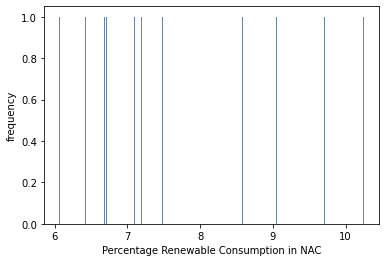

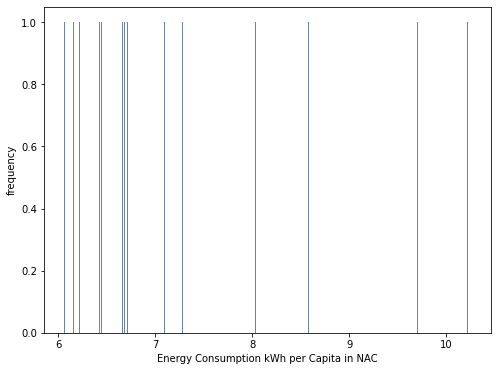

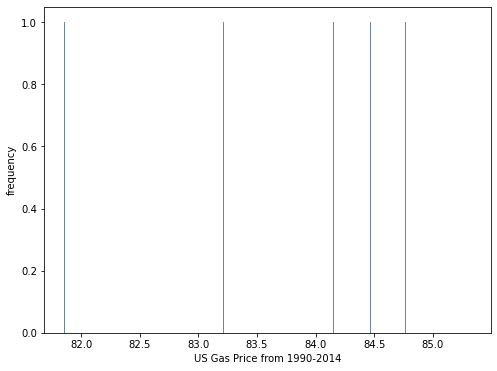

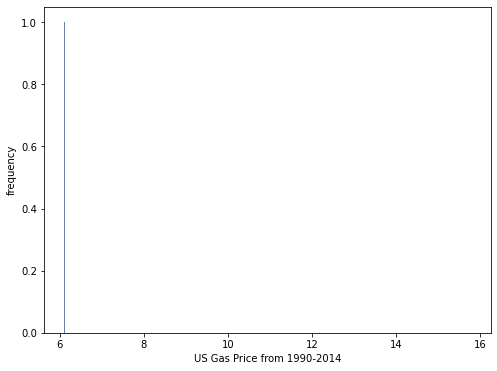

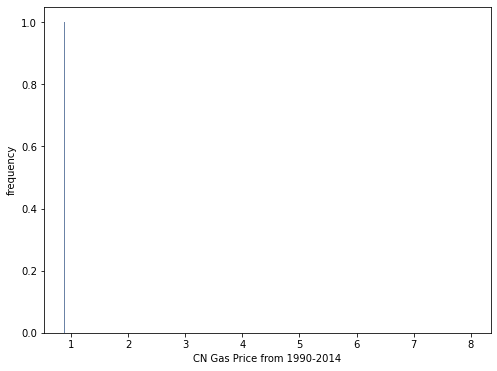

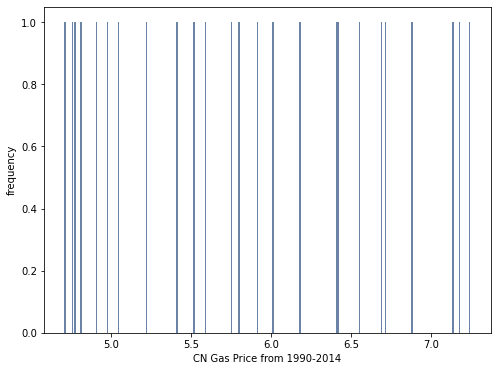

<Figure size 576x432 with 0 Axes>

In [304]:
#Histogram for Each Variable

#Percentage Renewable Consumption in NA
hist1 = thinkstats2.Hist(FP_df.renewConsumptionPercent)
thinkplot.Hist(hist1) 
thinkplot.Show(xlabel="Percentage Renewable Consumption in NAC", ylabel='frequency')

#kWhper_capita
hist2 = thinkstats2.Hist(FP_df.kWhper_capita)
thinkplot.Hist(hist1) 
thinkplot.Show(xlabel="Energy Consumption kWh per Capita in NAC", ylabel='frequency')

#%_fossilConsumption
hist3 = thinkstats2.Hist(FP_df.fossilConsumptionPercent)
thinkplot.Hist(hist3) 
thinkplot.Show(xlabel="US Gas Price from 1990-2014", ylabel='frequency')


#US Gas Price
hist4 = thinkstats2.Hist(FP_df.US_NaturalGasPrice)
thinkplot.Hist(hist4) 
thinkplot.Show(xlabel="US Gas Price from 1990-2014", ylabel='frequency')

#CN_NaturalGasPrice
hist5 = thinkstats2.Hist(FP_df.CN_NaturalGasPrice)
thinkplot.Hist(hist5) 
thinkplot.Show(xlabel="CN Gas Price from 1990-2014", ylabel='frequency')

#GDPperUnitEnery 
hist6 = thinkstats2.Hist(FP_df.GDPperUnitEnery )
thinkplot.Hist(hist6) 
thinkplot.Show(xlabel="CN Gas Price from 1990-2014", ylabel='frequency')




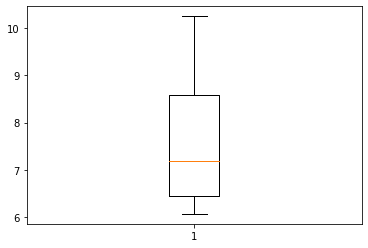

<Figure size 720x504 with 0 Axes>

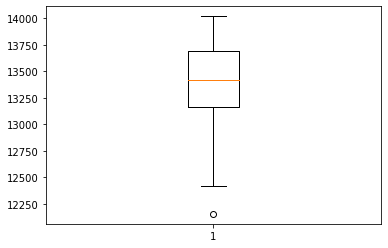

<Figure size 720x504 with 0 Axes>

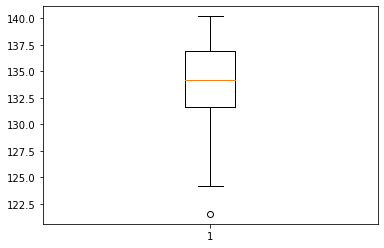

<Figure size 720x504 with 0 Axes>

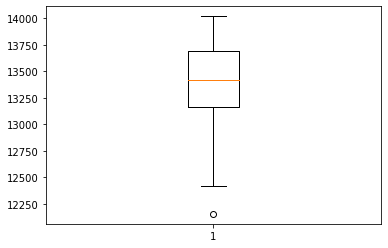

<Figure size 720x504 with 0 Axes>

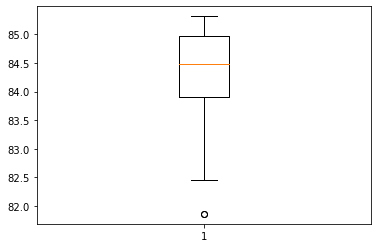

<Figure size 720x504 with 0 Axes>

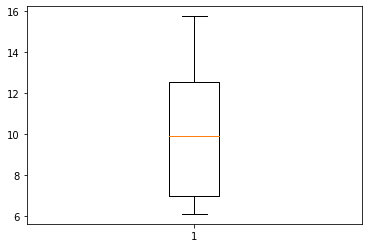

<Figure size 720x504 with 0 Axes>

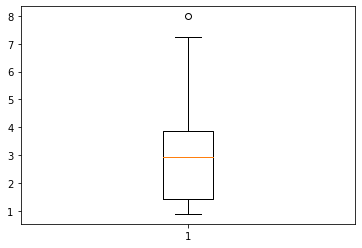

<Figure size 720x504 with 0 Axes>

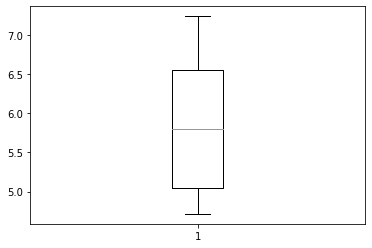

<Figure size 720x504 with 0 Axes>

In [438]:
#Boxplot IQR will be a better representation for the time series 

#Percentage Renewable Consumption in NA

boxplot1 = plt.boxplot(FP_df.renewConsumptionPercent)
fig = plt.figure(figsize =(10, 7))
plt.show()


#kWhper_capita
boxplot2 = plt.boxplot(FP_df.kWhper_capita )
fig = plt.figure(figsize =(10, 7))
plt.show()

FP_df['mod_kwHpercapita'] = FP_df['kWhper_capita']/100

#modify kWhper_capita
boxplot2 = plt.boxplot(FP_df.mod_kwHpercapita)
fig = plt.figure(figsize =(10, 7))
plt.show()

#kWhper_capita
boxplot2 = plt.boxplot(FP_df.kWhper_capita )
fig = plt.figure(figsize =(10, 7))
plt.show()

#%_fossilConsumption
boxplot3 = plt.boxplot(FP_df.fossilConsumptionPercent)
fig = plt.figure(figsize =(10, 7))
plt.show()


#US Gas Price
boxplot4 = plt.boxplot(FP_df.US_NaturalGasPrice)
fig = plt.figure(figsize =(10, 7))
plt.show()

#CN_NaturalGasPrice
boxplot5 = plt.boxplot(FP_df.CN_NaturalGasPrice)
fig = plt.figure(figsize =(10, 7))
plt.show()


#GDPperUnitEnery 
boxplot6 = plt.boxplot(FP_df.GDPperUnitEnery)
fig = plt.figure(figsize =(10, 7))
plt.show()









In [306]:
FP_df['mod_kwHpercapita'] = FP_df['kWhper_capita']/100
FP_df.columns

Index(['Country_Code', 'Year', 'renewConsumptionPercent', 'kWhper_capita',
       'fossilConsumptionPercent', 'GDPperUnitEnery', 'CN_NaturalGasPrice',
       'US_NaturalGasPrice', 'US_NGCons_millCubicFeet', 'mod_kwHpercapita'],
      dtype='object')

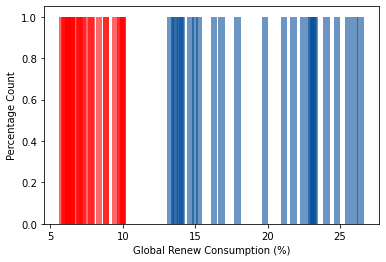

In [307]:
'''PDF Two scenerios for Renew Energy: Comparing renew energy consumption NAC vs AES
Renew_EAS = Renew[Renew["Country_Code"] == 'EAS']
Renew_NAC = Renew[Renew["Country_Code"] == 'NAC']'''
hist_EAS = thinkstats2.Hist(Renew_EAS['renewConsumptionPercent'])
hist_NAC= thinkstats2.Hist(Renew_NAC['renewConsumptionPercent'])

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(hist_NAC, align='right', width=width,color='red')
thinkplot.Hist(hist_EAS, align='left', width=width)
thinkplot.Config(xlabel='Global Renew Energy Consumption (%)', ylabel='Percentage Count')


In [308]:
'''PDF Analysis Continue '''
mean1 = Renew_EAS.renewConsumptionPercent.mean()
var1 = Renew_EAS.renewConsumptionPercent.var()
std1 = Renew_EAS.renewConsumptionPercent.std()

mean2 = Renew_NAC.renewConsumptionPercent.mean()
var2 = Renew_NAC.renewConsumptionPercent.var()
std2 = Renew_NAC.renewConsumptionPercent.std()

print('Renew Energy Consumption in EAS:', mean1,var1,std1)
print('Renew Energy Consumption in NAC:', mean2,var2,std2)

Renew Energy Consumption in EAS: 19.239458921111442 21.53447202667041 4.640524973176031
Renew Energy Consumption in NAC: 7.725317287850383 2.077104484221144 1.4412163211055944


In [309]:
#Time Series Analysis 
FP_df['Year']= pd.to_datetime(FP_df['Year'], format='%Y')
print(FP_df.dtypes)
FP_df['Year']


Country_Code                        object
Year                        datetime64[ns]
renewConsumptionPercent            float64
kWhper_capita                      float64
fossilConsumptionPercent           float64
GDPperUnitEnery                    float64
CN_NaturalGasPrice                 float64
US_NaturalGasPrice                 float64
US_NGCons_millCubicFeet            float64
mod_kwHpercapita                   float64
dtype: object


30   1990-01-01
31   1991-01-01
32   1992-01-01
33   1993-01-01
34   1994-01-01
35   1995-01-01
36   1996-01-01
37   1997-01-01
38   1998-01-01
39   1999-01-01
40   2000-01-01
41   2001-01-01
42   2002-01-01
43   2003-01-01
44   2004-01-01
45   2005-01-01
46   2006-01-01
47   2007-01-01
48   2008-01-01
49   2009-01-01
50   2010-01-01
51   2011-01-01
52   2012-01-01
53   2013-01-01
54   2014-01-01
Name: Year, dtype: datetime64[ns]

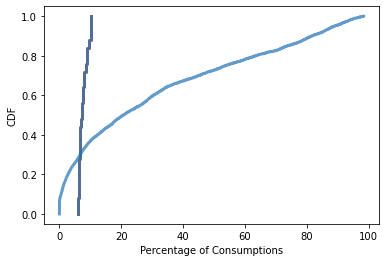

In [409]:
#CDF NAC vs Rest of the World
Renew_notNAC = Renew[Renew['Country_Code']!='NAC']
renew_notNAC = thinkstats2.Cdf(Renew_notNAC.renewConsumptionPercent, label='Renew Consumption')
renew_total = thinkstats2.Cdf(Renew.renewConsumptionPercent, label='Renew Consumption')
renewConsumptionPercent_CDF = thinkstats2.Cdf(FP_df.renewConsumptionPercent, label='renewConsumptionPercent')
thinkplot.Config(xlabel='Renew Enery Consumption by Percentage', ylabel='CDF', loc='upper left')
thinkplot.PrePlot(3)
thinkplot.Cdfs([renewConsumptionPercent_CDF,renew_notNAC ])
thinkplot.Config(xlabel='Percentage of Consumptions', ylabel='CDF')


"GDP_Unit_cdf = thinkstats2.Cdf(FP_df.GDPperUnitEnery, label='GDPperUnitEnery')\nthinkplot.Cdf(cdf)\nthinkplot.Config(xlabel='GDP per Unit Energy($)', ylabel='CDF', loc='upper left')"

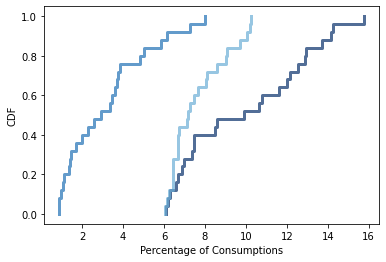

In [403]:
'''Multiple CDF'''
renewConsumptionPercent_CDF = thinkstats2.Cdf(FP_df.renewConsumptionPercent, label='renewConsumptionPercent')
fossilConsumptionPercent_CDF = thinkstats2.Cdf(FP_df.fossilConsumptionPercent , label='fossilConsumptionPercent ')
US_NaturalGasPrice_CDF = thinkstats2.Cdf(FP_df.US_NaturalGasPrice, label='US_NaturalGasPrice_CDF')
CN_NaturalGasPrice_CDF = thinkstats2.Cdf(FP_df.CN_NaturalGasPrice, label='CN_NaturalGasPrice_CDF')
thinkplot.PrePlot(3)
thinkplot.Cdfs([US_NaturalGasPrice_CDF,CN_NaturalGasPrice_CDF,renewConsumptionPercent_CDF])
thinkplot.Config(xlabel='Percentage of Consumptions', ylabel='CDF')

'''GDP_Unit_cdf = thinkstats2.Cdf(FP_df.GDPperUnitEnery, label='GDPperUnitEnery')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='GDP per Unit Energy($)', ylabel='CDF', loc='upper left')'''



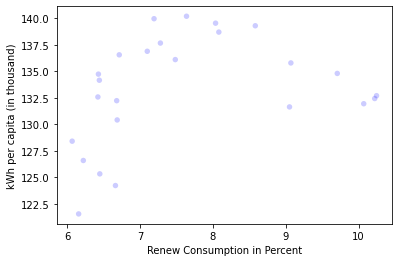

In [422]:
'''Plotting Scatter Plot Two variables'''
Renew_GDP_energy = thinkplot.Scatter(FP_df.renewConsumptionPercent ,FP_df.mod_kwHpercapita,label="Renew vs Kwh ",color='blue')
thinkplot.Config(xlabel='Renew Consumption in Percent', ylabel='kWh per capita (in thousand)', loc='upper left')

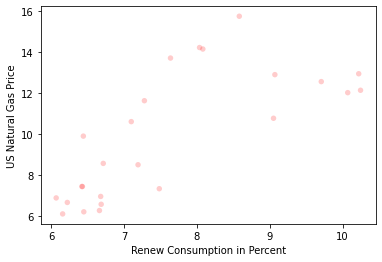

In [334]:
Renew_USpRice = thinkplot.Scatter(FP_df.renewConsumptionPercent ,FP_df.US_NaturalGasPrice,label="Renew vs Price",color='red')
thinkplot.Config(xlabel='Renew Consumption in Percent', ylabel='US Natural Gas Price', loc='upper left')

In [314]:
'''Correlation & Covariance '''
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs) #convert Python sequences to numPy arrays
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    """Computes Corr(X, Y).

    Args:
        xs: sequence of values
        ys: sequence of values

    Returns:
        Corr(X, Y)
    """
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = MeanVar(xs)
    meany, vary = MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)

    return corr

def MeanVar(xs, ddof=0):
    """Computes mean and variance.

    Based on http://stackoverflow.com/questions/19391149/
    numpy-mean-and-variance-from-single-function

    xs: sequence of values
    ddof: delta degrees of freedom
    
    returns: pair of float, mean and var
    """
    xs = np.asarray(xs)
    mean = xs.mean()
    s2 = Var(xs, mean, ddof)
    return mean, s2

def Var(xs, mu=None, ddof=0):
    """Computes variance.

    xs: sequence of values
    mu: option known mean
    ddof: delta degrees of freedom

    returns: float
    """
    xs = np.asarray(xs)

    if mu is None:
        mu = xs.mean()

    ds = xs - mu
    return np.dot(ds, ds) / (len(xs) - ddof)

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [419]:
import math
#Covariance
cov1 = Cov(FP_df.renewConsumptionPercent,FP_df.mod_kwHpercapita)
cov2 =Cov(FP_df.renewConsumptionPercent,FP_df.US_NaturalGasPrice) 
print(cov1, cov2)

2.110400646067445 3.0043867512251525


In [420]:
#Spearman Correlation
spear1 =SpearmanCorr(FP_df.renewConsumptionPercent,FP_df.mod_kwHpercapita)
spear2 =SpearmanCorr(FP_df.renewConsumptionPercent, FP_df.US_NaturalGasPrice)
print(corr1)
print(corr2)

[[1.         0.93454051]
 [0.93454051 1.        ]]
[[1.         0.73668381]
 [0.73668381 1.        ]]


In [421]:
#Pearsan Corr with log 
Pearson1 = Corr(FP_df.renewConsumptionPercent,np.log(FP_df.mod_kwHpercapita))
Pearson2 = Corr(FP_df.renewConsumptionPercent, np.log(FP_df.US_NaturalGasPrice))
print(Pearson1)
print(Pearson2)

0.31736145741891786
0.750742021287737


In [344]:
#Correlation Function  
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [417]:
'''Hypothesis Test : Is there correlation between renew consumption and GDPperUnitEnery '''
data1 = FP_df.renewConsumptionPercent,FP_df.mod_kwHpercapita
data1
ht = CorrelationPermute(data1)
pvalue1 = ht.PValue()
pvalue1



0.139

In [418]:
data2 = FP_df.renewConsumptionPercent, FP_df.US_NaturalGasPrice
ht = CorrelationPermute(data2)
pvalue2 = ht.PValue()
pvalue2



0.0

In [324]:
'''Linear Least Square '''
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [416]:
# Linear Least Square
inter, slope = LeastSquares(FP_df.renewConsumptionPercent, FP_df.mod_kwHpercapita)
inter, slope

(124.57214475694055, 1.1549767948429432)

In [425]:
#Good Fit 
fit_xs, fit_ys = FitLine(FP_df.renewConsumptionPercent, inter, slope)

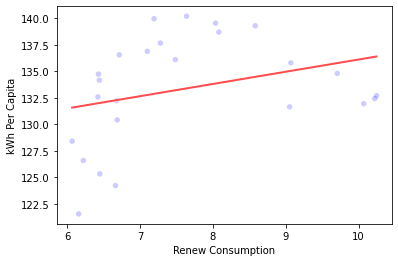

In [426]:
#ScatterPlot with Good Fit model 
thinkplot.Scatter(FP_df.renewConsumptionPercent, FP_df.mod_kwHpercapita)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Renew Consumption",
                 ylabel='kWh Per Capita',
                 legend=False)

In [353]:
'''Mutilple Regession Analysis Chpt 10 '''

'Mutilple Regession Analysis Chpt 10 '

In [354]:
import patsy

def GoMining(df):
    """Searches for variables that predict birth weight.

    df: DataFrame of pregnancy records

    returns: list of (rsquared, variable name) pairs
    """
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue

            formula = ' FP_df.renewConsumptionPercent ~ FP_df.fossilConsumptionPercent + ' + name
            
            # The following seems to be required in some environments
            # formula = formula.encode('ascii')

            model = smf.ols(formula, data=df)
            if model.nobs < len(df)/2:
                continue

            results = model.fit()
        except (ValueError, TypeError):
            continue

        variables.append((results.rsquared, name))

    return variables

In [355]:
variables = GoMining(FP_df)

In [356]:
import re
def ReadVariables():
    """Reads Stata dictionary files for NSFG data.

    returns: DataFrame that maps variables names to descriptions
    """
    vars1 = FP_df

    all_vars = vars1
    return all_vars

def MiningReport(variables, n=30):
    """Prints variables with the highest R^2.

    t: list of (R^2, variable name) pairs
    n: number of pairs to print
    """
    all_vars = ReadVariables()

    variables.sort(reverse=True)
    for r2, name in variables[:n]:
        key = re.sub('_r$', '', name)
        try:
            desc = all_vars.loc[key].desc
            if isinstance(desc, pd.Series):
                desc = desc[0]
            print(name, r2, desc)
        except (KeyError, IndexError):
            print(name, r2)

In [357]:
MiningReport(variables)

renewConsumptionPercent 1.0
GDPperUnitEnery 0.9759733388701332
US_NaturalGasPrice 0.939760985854316
mod_kwHpercapita 0.9256929488836952
kWhper_capita 0.9256929488836949
CN_NaturalGasPrice 0.9212857722371754
US_NGCons_millCubicFeet 0.8619374570492688
fossilConsumptionPercent 0.7918436445942184


In [361]:
import patsy

formula = ('renewConsumptionPercent ~ GDPperUnitEnery + mod_kwHpercapita + fossilConsumptionPercent+ US_NaturalGasPrice')
results = smf.ols(formula, data=FP_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     renewConsumptionPercent   R-squared:                       0.976
Model:                                 OLS   Adj. R-squared:                  0.971
Method:                      Least Squares   F-statistic:                     204.8
Date:                     Sat, 05 Jun 2021   Prob (F-statistic):           6.35e-16
Time:                             20:08:03   Log-Likelihood:                 3.7024
No. Observations:                       25   AIC:                             2.595
Df Residuals:                           20   BIC:                             8.690
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   54.0419      8.014      6.744      0.000      37.325      70.759
GDPperUnitEnery              0.9330      0.198      4.705      0.000       0.519       1.347
mod_kwHpercapita             0.0054      0.017      0.312      0.758      -0.031       0.042
fossilConsumptionPercent    -0.6256      0.101     -6.166      0.000      -0.837      -0.414
US_NaturalGasPrice           0.0074      0.038      0.195      0.848      -0.072       0.087
==============================================================================
Omnibus:                        1.369   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                0.329
Skew:                          -0.014   Prob(JB):                        0.848
Kurtosis:                       3.561   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

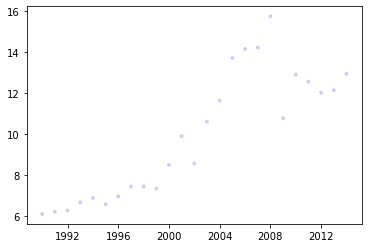

In [370]:
'''Time Series Analysis'''
thinkplot.Scatter(FP_df.Year, FP_df.US_NaturalGasPrice, s=15, label="US Price")


In [429]:
import patsy

def RunLinearModel(FP_df):
    
    formula = ('renewConsumptionPercent ~ GDPperUnitEnery + mod_kwHpercapita + fossilConsumptionPercent+ US_NaturalGasPrice')
    model = smf.ols(formula, data=FP_df)
    results = smf.ols(formula, data=FP_df).fit()
    return model, results

def PlotFittedValues(model, results):
    """Plots original data and fitted values.

    model: StatsModel model object
    results: StatsModel results object
    """
    years = model.exog[:,1]
    values = model.endog
    thinkplot.Scatter(FP_df.Year,FP_df.renewConsumptionPercent, s=15, label='NAC Renew Energy Consumption')
    thinkplot.Plot(FP_df.Year, results.fittedvalues, label='model', color='#ff7f00')
    thinkplot.Config(xlabel='NAC Renew Energy Consumption (%)', ylabel='NAC Renew Energy Consumptio')

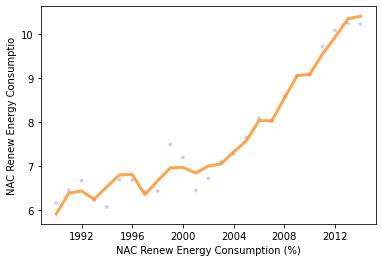

In [430]:
import patsy
model1, results1 = RunLinearModel(FP_df)
PlotFittedValues(model1,results1)

In [431]:
'''Experimenting with Moving Weight'''

def PlotEWMA(FP_df):
    thinkplot.Scatter(FP_df.Year,FP_df.renewConsumptionPercent, alpha=0.2, label="North America Renewable Energy")
    roll_mean = FP_df.US_NaturalGasPrice.ewm(30).mean()
    thinkplot.Plot(FP_df.Year,roll_mean, label='EWMA', color='#ff7f00')
    plt.xticks(rotation=30)
    thinkplot.Config(xlabel = 'Year', ylabel='NAC Renew Energy Consumption (%)')

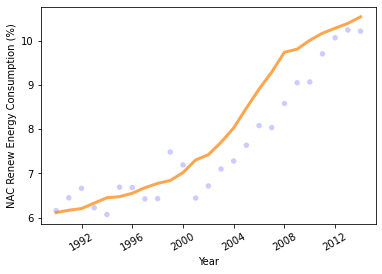

In [432]:
#Expotnentially-weighted moving average 
PlotEWMA(FP_df)